<a href="https://colab.research.google.com/github/Nikkuchan/AIDA-Group8/blob/main/58025_CS8InsightDevelopment_Wagler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
gamers_perspective_df = pd.read_csv("Gamers_Perspective.csv")

In [ ]:
gamers_perspective_df

In [15]:
gamers_perspective_df.head(5)

,Timestamp,The use of this survey is clear to me and I give my consent for handling my data.,Name,Age,Gender,1. How often do you play online games?,2. Have you experienced being trash talked by other players while playing online games?,"3. If you answered yes in no. 2, what do you usually feel when being trash talked by someone? (select all that apply)","4. If you answered yes in no.2, what action(s) do you usually take?","5. If you answered yes in no. 2, did any of your in-game trash talking experience escalate to a physical fight?",6. Have you ever trash talked someone while playing online games?,"7. If you answered yes in no.6, what are your reasons for doing so? (Select all that apply)","Whenever a teammate is playing poorly, you tend to call them names or curse at them out of frustration.",Trash talking among players is an essential part of multiplayer gaming culture.,Trash talking gives thrill and excitement to the players during the game.,Trash talking influences the way you act towards other people.,Trash talking can be considered as a form of strategy or gaming tactics.,Trash talking competitor players provides a sense of power and freedom,Trash talking in online games is a form of harassment,Trash talking can be both friendly and toxic.,Trash talking in online game is just another form of showing competitiveness.,Receiving trash talks from other players can negatively affect one’s gaming performance.
0,2021/04/28 12:47:21 AM GMT+8,Yes,Jasmine Clare B. Padilla,22,Female,Yes,Yes,Angry;Disheartened;Embarrassed;Entertained,Trash talk back to that player;Laugh at it,No,No,NaN,4,2,2,5,2,2,2,2,2,2
1,2021/04/28 12:50:17 AM GMT+8,Yes,"Reyes, Adrian Philipp",20,Male,Yes,Yes,Angry;Motivated;Entertained,Ignore it;Report the player;Trash talk back to...,No,Yes,Annoyed by someone’s poor gaming performance;T...,2,1,1,2,2,2,1,1,2,1
2,2021/04/28 12:57:07 AM GMT+8,Yes,ADRIAN,21,Male,Always,Yes,Entertained,NaN,No,Yes,To distract them;It heightens the fun,3,4,3,3,3,3,3,1,4,3
3,2021/04/28 12:57:40 AM GMT+8,Yes,Charles cordero,21,Male,Always,Yes,Motivated;Entertained,Ignore it;Report the player;Trash talk back to...,No,Yes,Annoyed by someone’s poor gaming performance;T...,3,3,5,1,2,5,1,1,5,1
4,2021/04/28 12:59:17 AM GMT+8,Yes,Philip Julrenz A. Pionelo,21,Male,Always,Yes,Angry;Sad;Disheartened;Embarrassed;Motivated;E...,Ignore it;Report the player;Laugh at it,NaN,No,NaN,5,4,4,1,5,5,3,3,5,2


#Cleaning of Data
In this section, certain data might be removed or modified in order to remove irrelevant data to the study. 



In [16]:
# The researchers will be creating a back up file before changing anything to the dataset 
trashtalk_df = gamers_perspective_df.copy()

In [ ]:
# The first two responses came from the researchers, they suggested that question #1 should be changed. 
# Hence, the first two responses for question #1  will be modified accordingly. 
trashtalk_modify_YES = (trashtalk_df['1. How often do you play online games?'][0]) = 'Often'
trashtalk_modify_YES2 = (trashtalk_df['1. How often do you play online games?'][1]) = 'Always'
trashtalk_df['1. How often do you play online games?'][0] = trashtalk_modify_YES
trashtalk_df['1. How often do you play online games?'][1] = trashtalk_modify_YES2

In [18]:
# The first and second coulmn was removed [Timestamp and the Consent form]
trashtalk_df.drop(['Timestamp'], axis=1, inplace = True)
trashtalk_df.drop(['The use of this survey is clear to me and I give my consent for handling my data. '], axis=1,inplace = True)

In [19]:
trashtalk_df.head(1)

,Name,Age,Gender,1. How often do you play online games?,2. Have you experienced being trash talked by other players while playing online games?,"3. If you answered yes in no. 2, what do you usually feel when being trash talked by someone? (select all that apply)","4. If you answered yes in no.2, what action(s) do you usually take?","5. If you answered yes in no. 2, did any of your in-game trash talking experience escalate to a physical fight?",6. Have you ever trash talked someone while playing online games?,"7. If you answered yes in no.6, what are your reasons for doing so? (Select all that apply)","Whenever a teammate is playing poorly, you tend to call them names or curse at them out of frustration.",Trash talking among players is an essential part of multiplayer gaming culture.,Trash talking gives thrill and excitement to the players during the game.,Trash talking influences the way you act towards other people.,Trash talking can be considered as a form of strategy or gaming tactics.,Trash talking competitor players provides a sense of power and freedom,Trash talking in online games is a form of harassment,Trash talking can be both friendly and toxic.,Trash talking in online game is just another form of showing competitiveness.,Receiving trash talks from other players can negatively affect one’s gaming performance.
0,Jasmine Clare B. Padilla,22,Female,Often,Yes,Angry;Disheartened;Embarrassed;Entertained,Trash talk back to that player;Laugh at it,No,No,NaN,4,2,2,5,2,2,2,2,2,2


In [20]:
# Removing some features that were collected using a likert scale
trashtalk_df.drop(['Whenever a teammate is playing poorly, you tend to call them names or curse at them out of frustration.'], axis=1, inplace = True)
trashtalk_df.drop(['Trash talking influences the way you act towards other people.'], axis=1, inplace = True)
trashtalk_df.drop(['Trash talking in online game is just another form of showing competitiveness.'], axis=1, inplace = True)
trashtalk_df.drop(['Trash talking competitor players provides a sense of power and freedom '], axis=1, inplace = True)

In [30]:
trashtalk_df.head(1)

,Name,Age,Gender,1. How often do you play online games?,2. Have you experienced being trash talked by other players while playing online games?,"3. If you answered yes in no. 2, what do you usually feel when being trash talked by someone? (select all that apply)","4. If you answered yes in no.2, what action(s) do you usually take?","5. If you answered yes in no. 2, did any of your in-game trash talking experience escalate to a physical fight?",6. Have you ever trash talked someone while playing online games?,"7. If you answered yes in no.6, what are your reasons for doing so? (Select all that apply)",Trash talking among players is an essential part of multiplayer gaming culture.,Trash talking gives thrill and excitement to the players during the game.,Trash talking can be considered as a form of strategy or gaming tactics.,Trash talking in online games is a form of harassment,Trash talking can be both friendly and toxic.,Receiving trash talks from other players can negatively affect one’s gaming performance.
0,Jasmine Clare B. Padilla,22,Female,Often,Yes,Angry;Disheartened;Embarrassed;Entertained,Trash talk back to that player;Laugh at it,No,No,NaN,2,2,2,2,2,2


In [36]:
trashtalk_df.loc[65]['Age']

'MALVAR'

In [37]:
#The researchers decided to remove the 65th recorded response from the dataset for the reason that 
# the respondent inputted "MALVAR" as his age and didn't select an answer for the 3rd question.
trashtalk_df.drop(labels=65, axis=0, inplace=True)

In [38]:
trashtalk_df.loc[64:66]

,Name,Age,Gender,1. How often do you play online games?,2. Have you experienced being trash talked by other players while playing online games?,"3. If you answered yes in no. 2, what do you usually feel when being trash talked by someone? (select all that apply)","4. If you answered yes in no.2, what action(s) do you usually take?","5. If you answered yes in no. 2, did any of your in-game trash talking experience escalate to a physical fight?",6. Have you ever trash talked someone while playing online games?,"7. If you answered yes in no.6, what are your reasons for doing so? (Select all that apply)",Trash talking among players is an essential part of multiplayer gaming culture.,Trash talking gives thrill and excitement to the players during the game.,Trash talking can be considered as a form of strategy or gaming tactics.,Trash talking in online games is a form of harassment,Trash talking can be both friendly and toxic.,Receiving trash talks from other players can negatively affect one’s gaming performance.
64,Karl mathew,21,Male,Always,Yes,Entertained,Ignore it;Laugh at it,No,Yes,Annoyed by someone’s poor gaming performance;T...,2,2,1,3,2,2
66,Ayen Quiñones,17,Male,Always,Yes,Angry;Sad;Disheartened;Embarrassed;Motivated;E...,Ignore it;Report the player;Trash talk back to...,No,Yes,Annoyed by someone’s poor gaming performance;T...,1,4,1,2,1,1


In [39]:
trashtalk_df.loc[138]['Age'], trashtalk_df.loc[156]['Age'], 

('18 Years old', '16 years old')

In [40]:
# removing "y/Years old" string in AGE column
trashtalk_df['Age'] = trashtalk_df['Age'].map(lambda x: x.rstrip('yYears old'))

In [41]:
trashtalk_df.loc[138]['Age'], trashtalk_df.loc[156]['Age']

('18', '16')

In [42]:
#Question number 1 was changed and due to that when the researchers were testing the questionnaire one of the answer does not respond to the frequency of how often they play games.
# with some of the inputted answers or the given set of choices (ex. someone inputted 'Amused' which is similar to Entertained trashtalkq3_df)
q1_df = trashtalk_df['1. How often do you play online games?']


In [43]:
q1_df.loc[0], q1_df.loc[1]

('Often', 'Always')

In [44]:
#Question number 3 is an open-ended question. Some inputted responses are similar to or hold similar meaning
# with some of the inputted answers or the given set of choices (ex. someone inputted 'Amused' which is similar to Entertained trashtalkq3_df)
q3_df = trashtalk_df['3. If you answered yes in no. 2, what do you usually feel when being trash talked by someone? (select all that apply) ']


In [45]:
q3_df.loc[105], q3_df.loc[192], q3_df.loc[183], q3_df.loc[20], q3_df.loc[96], q3_df.loc[170], q3_df.loc[26], q3_df.loc[58]

('Challenged',
 'Angry;sometimes dedma',
 'Angry;not that much',
 'Entertained;indifferent',
 "Don't care. I know I did my best, and toxic players decrease chance of winning.",
 'Motivated;Entertained;Amused',
 'Angry;Disheartened;Embarrassed;Motivated;Entertained;Salty',
 'Annoyed/nababastos ako madalas hahaha')

In [ ]:
q3_dclean = (q3_df.loc[105]) = 'Motivated'
q3_dclean = (q3_df.loc[192]) = 'Angry;Nothing'
q3_dclean = (q3_df.loc[183]) = 'Angry;Nothing'
q3_dclean = (q3_df.loc[20]) = 'Entertained;Nothing'
q3_dclean = (q3_df.loc[96]) = 'Nothing'
q3_dclean = (q3_df.loc[170]) = 'Motivated;Entertained'
q3_dclean = (q3_df.loc[26]) = 'Angry;Disheartened;Embarrassed;Motivated;Entertained'
q3_dclean = (q3_df.loc[58]) = 'Annoyed'

In [47]:
q3_df.loc[105], q3_df.loc[192], q3_df.loc[183], q3_df.loc[20], q3_df.loc[96], q3_df.loc[170], q3_df.loc[26], q3_df.loc[58]

('Motivated',
 'Angry;Nothing',
 'Angry;Nothing',
 'Entertained;Nothing',
 'Nothing',
 'Motivated;Entertained',
 'Angry;Disheartened;Embarrassed;Motivated;Entertained',
 'Annoyed')

In [48]:
#Question number 4 involves a choice where respondents can put other actions they do if it is not in the choices. However, some of those holds similar meaning to the given actions.
# with some of the inputted answers or the given set of choices (ex. someone inputted 'Amused' which is similar to Entertained trashtalkq3_df)
q4_df = trashtalk_df['4. If you answered yes in no.2, what action(s) do you usually take?']

In [49]:
q4_df.loc[122], q4_df.loc[175]

('Report the player;Trash talk back to that player;Usually depends upon the situation. When I am in a bad mood, I talk back to the player aggressively. When in good mood, I usually tell them not to be toxic and just play. If my teammate talks trash against me, I usually ignore them or induce their conscience. If an enemy talks trash, I mute them. I always report them.',
 'Ignore it;Report the player;Trash talk back to that player;Laugh at it;iniignore ko lang yung trashtalk pag kulang ako sa oras hahaha pero legit nirereport ko ')

In [ ]:
q4_dclean = (q4_df.loc[122]) = 'Report the player;Trash talk back to that player'
q4_dclean = (q4_df.loc[175]) = 'Ignore it;Report the player;Trash talk back to that player;Laugh at it'

In [51]:
q4_df.loc[122], q4_df.loc[175]

('Report the player;Trash talk back to that player',
 'Ignore it;Report the player;Trash talk back to that player;Laugh at it')

In [52]:
q4_df.loc[87]

'Laugh at it;Revenge. Do the best that I can and win the game.'

In [ ]:
q4_dclean = (q4_df.loc[87]) = 'Laugh at it;Ignore it'

In [54]:
q4_df.loc[87]

'Laugh at it;Ignore it'

In [55]:
#Question number 7 involves a choice where respondents can put other actions they do if it is not in the choices. However, some of those holds similar meaning to the given actions.
# with some of the inputted answers or the given set of choices (ex. someone inputted 'Amused' which is similar to Entertained trashtalkq3_df)
q7_df = trashtalk_df['7. If you answered yes in no.6, what are your reasons for doing so? (Select all that apply) ']

In [56]:
q7_df.loc[47], q7_df.loc[28], q7_df.loc[57], q7_df.loc[58], q7_df.loc[75], q7_df.loc[87], q7_df.loc[111], q7_df.loc[122], q7_df.loc[175], q7_df.loc[179], q7_df.loc[184], q7_df.loc[196], q7_df.loc[20], q7_df.loc[109], q7_df.loc[149], q7_df.loc[183]

("I just trash talk players who does it first. Also, when I'm triggered by their badmouthing. Sometimes, they just need to get a taste of their own medicine.",
 'Only when someone trash talked me',
 'It heightens the fun;To assert my competitiveness;Because he/she is my close friend',
 'Naka off-mic naman ako saka di ko chinachat so ako lang nakakaalam na trinatrasvtk ko na sila counted ba yun hhahahahahha',
 'Annoyed by someone’s poor gaming performance;It heightens the fun;Trashtalk back at them ',
 "It heightens the fun;Basically, I'm just giving back the trashtalk that they gave to me.",
 'If they talk trash to me first, i will fight back.',
 'I only talk trash when they talked trash against me first.',
 'tinatrashtalk ko lang yung mga nang tatrashtalk sakin or sa mga kasama ko mag laro ',
 'It heightens the fun;If they trashtalk first',
 'When they started it.',
 'Annoyed by someone’s poor gaming performance;To distract them;It heightens the fun;To assert my competitiveness;Fight 

In [ ]:
q7_dclean = (q7_df.loc[47]) = 'Trash talk back to the player'
q7_dclean = (q7_df.loc[28]) = 'Trash talk back to the player'
q7_dclean = (q7_df.loc[57]) = 'It heightens the fun;To assert my competitiveness;I know the person so Im just kidding him/her'
q7_dclean = (q7_df.loc[58]) = 'Trash talk back to the player'
q7_dclean = (q7_df.loc[75]) = 'Annoyed by someone’s poor gaming performance;It heightens the fun;Trash talk back to the player'
q7_dclean = (q7_df.loc[87]) = "It heightens the fun;Trash talk back to the player"
q7_dclean = (q7_df.loc[111]) = 'Trash talk back to the player'
q7_dclean = (q7_df.loc[122]) = 'Trash talk back to the player'
q7_dclean = (q7_df.loc[175]) = 'Trash talk back to the player;I know the person Im just kidding him/her'
q7_dclean = (q7_df.loc[179]) = 'It heightens the fun;Trash talk back to the player'
q7_dclean = (q7_df.loc[184]) = 'Trash talk back to the player'
q7_dclean = (q7_df.loc[196]) = 'Annoyed by someone’s poor gaming performance;To distract them;It heightens the fun;To assert my competitiveness;Trash talk back to the player'
q7_dclean = (q7_df.loc[20]) = "I know the person so I'm just kidding him/her"
q7_dclean = (q7_df.loc[109]) = "Annoyed by someone’s poor gaming performance;It heightens the fun;I know the person Im just kidding him/her"
q7_dclean = (q7_df.loc[149]) = 'Annoyed by someone’s poor gaming performance;It heightens the fun'
q7_dclean = (q7_df.loc[183]) = 'It heightens the fun;To assert my competitiveness'

In [58]:
q7_df.loc[47], q7_df.loc[28], q7_df.loc[57], q7_df.loc[58], q7_df.loc[75], q7_df.loc[87], q7_df.loc[111], q7_df.loc[122], q7_df.loc[175], q7_df.loc[179], q7_df.loc[184], q7_df.loc[196], q7_df.loc[20], q7_df.loc[109], q7_df.loc[149], q7_df.loc[183]

('Trash talk back to the player',
 'Trash talk back to the player',
 'It heightens the fun;To assert my competitiveness;I know the person so Im just kidding him/her',
 'Trash talk back to the player',
 'Annoyed by someone’s poor gaming performance;It heightens the fun;Trash talk back to the player',
 'It heightens the fun;Trash talk back to the player',
 'Trash talk back to the player',
 'Trash talk back to the player',
 'Trash talk back to the player;I know the person Im just kidding him/her',
 'It heightens the fun;Trash talk back to the player',
 'Trash talk back to the player',
 'Annoyed by someone’s poor gaming performance;To distract them;It heightens the fun;To assert my competitiveness;Trash talk back to the player',
 "I know the person so I'm just kidding him/her",
 'Annoyed by someone’s poor gaming performance;It heightens the fun;I know the person Im just kidding him/her',
 'Annoyed by someone’s poor gaming performance;It heightens the fun',
 'It heightens the fun;To assert 

In [59]:
#NOTE: Once the data cleaning is performed, save it as a new dataset.
trashtalk_df.to_csv("trashtalk.csv")

# Data Visualization

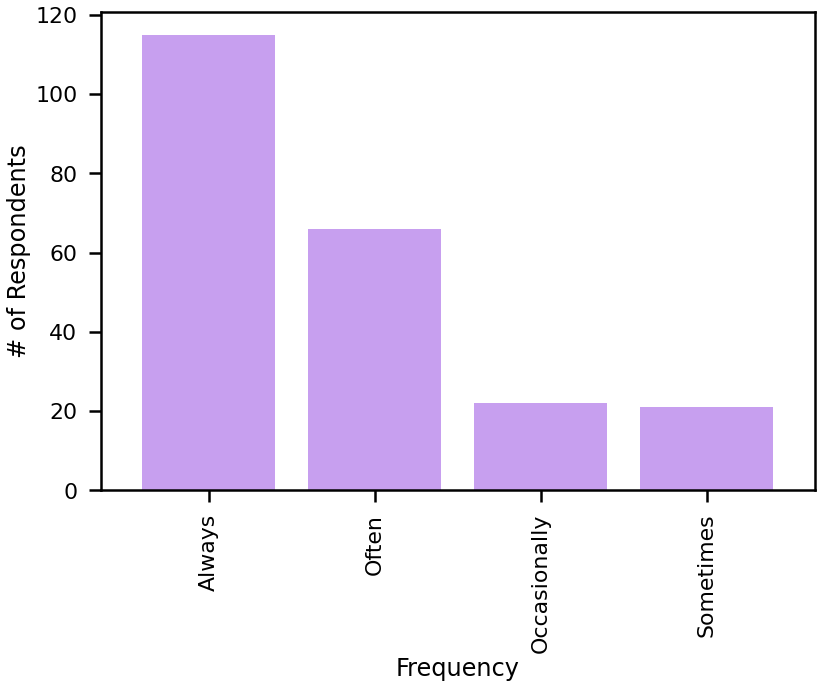

In [60]:
ax = trashtalk_df['1. How often do you play online games?'].value_counts().plot.bar(width=.8, color='#c79fef')
ax.set_xlabel('Frequency')
ax.set_ylabel('# of Respondents')

plt.style.use('seaborn-poster')
sns.set_context('poster')

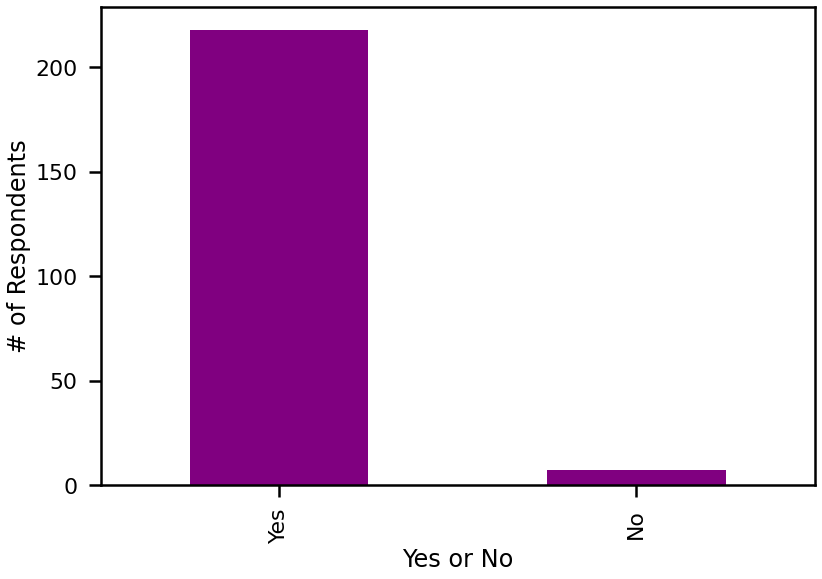

In [32]:
ax = trashtalk_df['2. Have you experienced being trash talked by other players while playing online games?'].value_counts().plot.bar(color='#800080')
ax.set_xlabel('Yes or No')
ax.set_ylabel('# of Respondents')

plt.style.use('seaborn-pastel')
sns.set_context('poster')

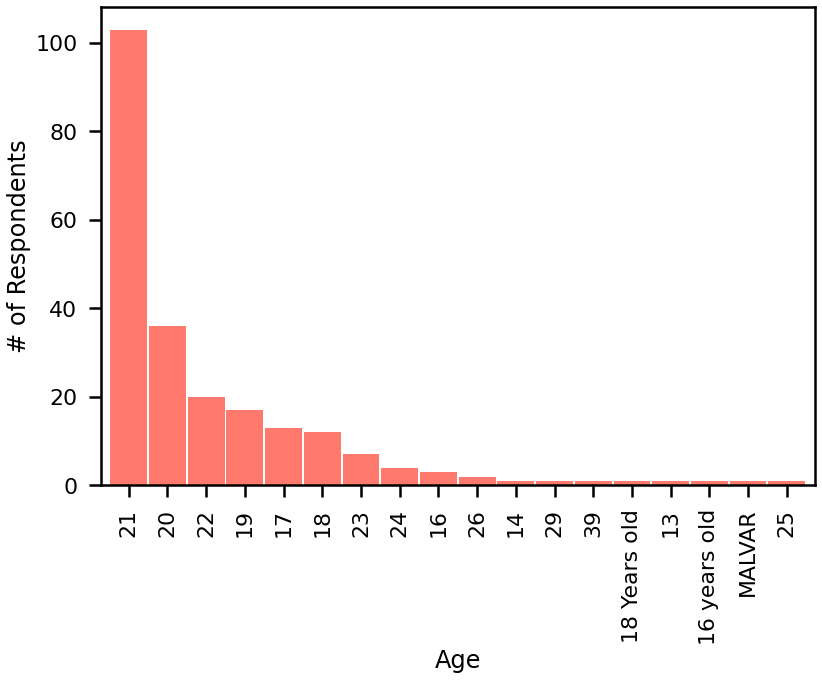

In [33]:
ax = trashtalk_df['Age'].value_counts().plot.bar(width=.95, color='#ff796c')
ax.set_xlabel('Age')
ax.set_ylabel('# of Respondents')

plt.style.use('seaborn-pastel')
sns.set_context('poster')

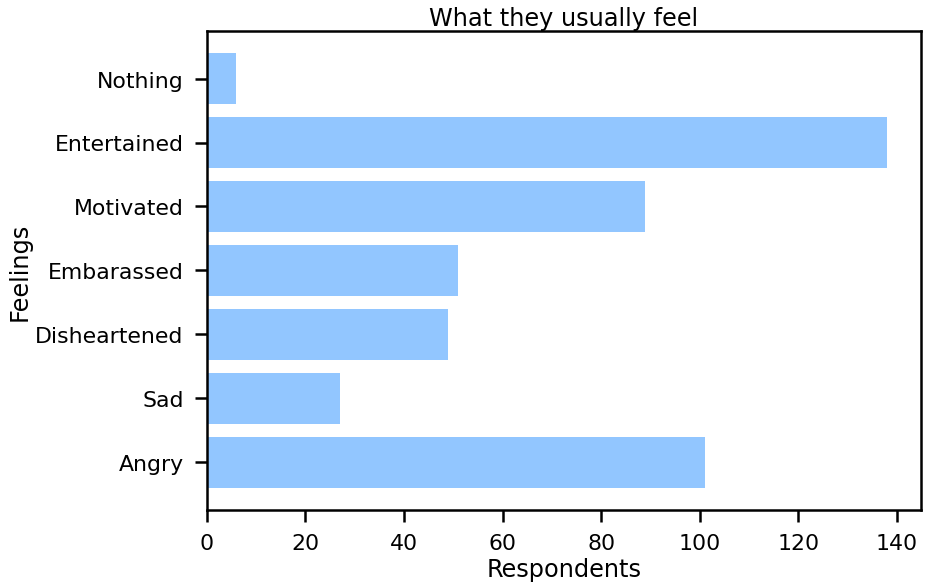

In [34]:
Feelings = ['Angry','Sad','Disheartened','Embarassed','Motivated','Entertained','Nothing']
Respondents = [101,27,49,51,89,138,6]

plt.style.use('seaborn-pastel')
sns.set_context('poster')

plt.barh(Feelings,Respondents)
plt.title('What they usually feel')
plt.ylabel('Feelings')
plt.xlabel('Respondents')
plt.show()

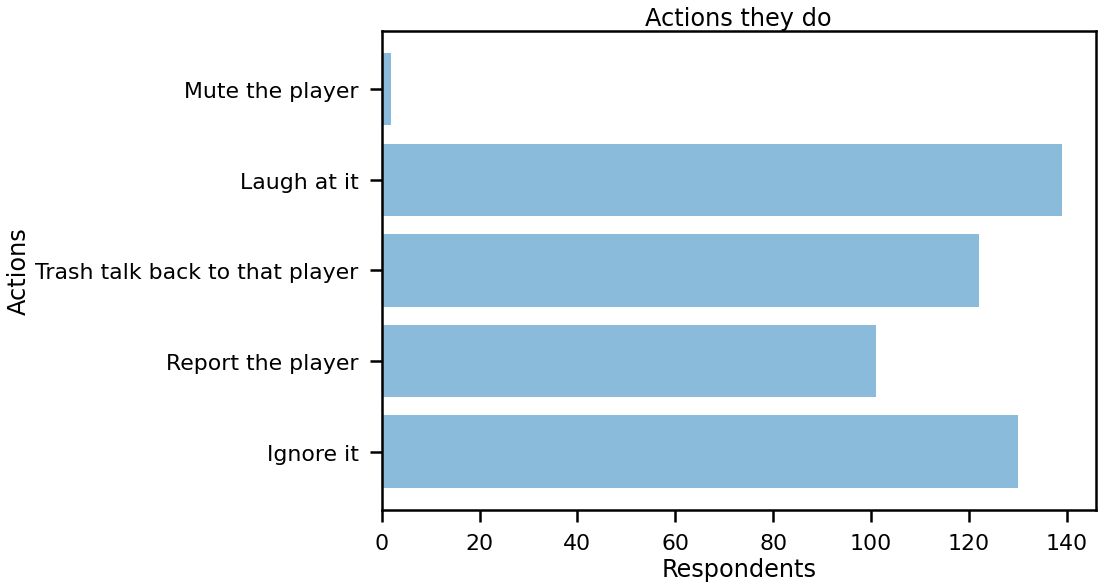

In [35]:
Actions = ['Ignore it','Report the player','Trash talk back to that player','Laugh at it','Mute the player']
Respondents = [130,101,122,139,2]

sns.set_context('poster')
sns.set_palette("Blues_d")

plt.barh(Actions,Respondents)
plt.title('Actions they do')
plt.ylabel('Actions')
plt.xlabel('Respondents')
plt.show()